In [1]:
!pip install pyspark
!pip install bnlp_toolkit
!pip install nlu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=b6cbb92fde581ddfbeb56f9427385a3a49c6be19ae3bace15fe2bd00af17ff9c
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark
  Obtaining dependency information for bnlp_toolkit from https://files.pythonhosted.org/packages/af/99/5d688fc2e5f6494d6c0a4e6bcdc8192266869caeef3b41dbc3dc8358616d/bnlp_toolkit-4.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for wcwidth<0

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import BengaliCorpus as corpus
from bnlp import CleanText
from sklearn.feature_extraction.text import TfidfVectorizer
from bnlp import NLTKTokenizer
import nlu

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_df = pd.read_excel("/kaggle/input/bemoc-dataset/cleaned_BEmoC7k.xlsx")

In [4]:
train_df.head()

,TEXT,classes
0,নাইমা কি করবেন আমরা জানি,sadness
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust


In [5]:
train_df.dropna(inplace=True)

In [6]:
longest_string = max(train_df["TEXT"], key=len)
print(len(longest_string))

1093


In [7]:
clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="<URL>",
   replace_with_email="<EMAIL>",
   replace_with_number="<NUMBER>",
   replace_with_digit="<DIGIT>",
   replace_with_punct = "<PUNC>"
)

train_df['TEXT'] = train_df['TEXT'].apply(clean_text)

In [8]:
longest_string = max(train_df["TEXT"], key=len)
print(len(longest_string))

1120


In [9]:
def create_lemma(text):
     return " ".join(text)

In [10]:
text_list = train_df["TEXT"].tolist()
lemmatized_result = nlu.load('bn.lemma').predict(text_list, output_level = "document")
lemmatized_result

:: loading settings :: url = jar:file:/opt/conda/lib/python3.10/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.johnsnowlabs.nlp#spark-nlp_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-a7d9e70e-eb60-47eb-8e03-55d283d11601;1.0
	confs: [default]
	found com.johnsnowlabs.nlp#spark-nlp_2.12;5.1.4 in central
	found com.typesafe#config;1.4.2 in central
	found org.rocksdb#rocksdbjni;6.29.5 in central
	found com.amazonaws#aws-java-sdk-bundle;1.11.828 in central
	found com.github.universal-automata#liblevenshtein;3.0.0 in central
	found com.google.protobuf#protobuf-java-util;3.0.0-beta-3 in central
	found com.google.protobuf#protobuf-java;3.0.0-beta-3 in central
	found com.google.code.gson#gson;2.3 in central
	found it.unimi.dsi#fastutil;7.0.12 in central
	found org.projectlombok#lombok;1.16.8 in central
	found com.google.cloud#google-cloud-storage;2.20.1 in central
	found com.google.guava#guava;31.1-jre in central
	found com.google.guava#failureaccess;1.0.1 

lemma download started this may take some time.
Approximate size to download 90.6 KB
[ | ]lemma download started this may take some time.
Approximate size to download 90.6 KB
[ \ ]Download done! Loading the resource.
[OK!]


,document,lem
0,নাইমা কি করবেন আমরা জানি,"[নাইমা, কি, করবেন, আমি, জানা]"
1,ভাই সব আপনাদের খুব ভাল লাগছে,"[ভাই, সব, আপনি, খুব, ভাল, লাগছে]"
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ক...,"[গাঞ্জা, খাইয়া, নিউজ, শেয়ার, করা, দিগন্ত, বয..."
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,"[অনেক, ধন্যবাদ, স্যার, যশোরে, ইত্যাদি, অনুষ্ঠা..."
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,"[বর্তমান, মুসলমান, মারে, যে, জন, সে, জন, হয়েছ..."
...,...,...
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন আর...,"[হে, আল্লাহ, আপনি, আমি, দেশ, প্রতি, সহায়ক, হও..."
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,"[ঈদ, ছারাও, যুদি, বাংলাদেশ, ঈদের, খুশির, অামেজ..."
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের স...,"[বছর, সবচেয়ে, সেরা, ভিডিও, দেখা, আমি, দেশ, সা..."
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি ...,"[কিরে, মিথ্যা, কথা, কস, কেন, গতদিন, আমি, আর, আ..."


In [11]:
# Extracting lemmatized text from the results
lemmatized_text_list = lemmatized_result['lem']

# Adding lemmatized text as a new column to train_df
train_df['Lemmatized_Text'] = lemmatized_text_list

train_df['Lemmatized_Text']=train_df['Lemmatized_Text'].apply(create_lemma)

In [12]:
train_df

,TEXT,classes,Lemmatized_Text
0,নাইমা কি করবেন আমরা জানি,sadness,নাইমা কি করবেন আমি জানা
1,ভাই সব আপনাদের খুব ভাল লাগছে,joy,ভাই সব আপনি খুব ভাল লাগছে
2,গাঞ্জা খাইয়া নিউজ শেয়ার করছে দিগন্ত বয়কটে ...,anger,গাঞ্জা খাইয়া নিউজ শেয়ার করা দিগন্ত বয়কটে কো...
3,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করার...,joy,অনেক ধন্যবাদ স্যার যশোরে ইত্যাদি অনুষ্ঠান করা ...
4,বর্তমানে মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর,disgust,বর্তমান মুসলমান মারে যে জন সে জন হয়েছে ঈশ্বর
...,...,...,...
6995,হে আল্লাহ আপনি আমাদের দেশের প্রতি সহায়ক হন ...,sadness,হে আল্লাহ আপনি আমি দেশ প্রতি সহায়ক হওয়া আর ঐ ...
6996,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...,joy,ঈদ ছারাও যুদি বাংলাদেশ ঈদের খুশির অামেজ পান তব...
6997,বছরের সবচেয়ে সেরা ভিডিও দেখেছি আমাদের দেশের ...,joy,বছর সবচেয়ে সেরা ভিডিও দেখা আমি দেশ সাথে ভূটান...
6998,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি...,anger,কিরে মিথ্যা কথা কস কেন গতদিন আমি আর আসিফ আসছি ...


In [13]:
longest_string = max(train_df["Lemmatized_Text"], key=len)
print(len(longest_string))

1029


In [14]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(train_df['Lemmatized_Text'])

# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Find mean TF-IDF score for each word across all documents
word_scores = tfidf_df.mean(axis=0)

# Set a threshold to identify less important words (adjust threshold as needed)
threshold = 0.00005 # For example, you can set a threshold value

# Get less important words based on threshold
less_important_words = word_scores[word_scores < threshold]

# Display words that will be removed
print("Less important words:")
print(less_important_words)

Less important words:
অপশনও    0.000037
অবতরণ    0.000045
অবসরপ    0.000025
অমলপ     0.000049
অলকবন    0.000030
           ...   
হরণস     0.000048
হরম      0.000044
হলও      0.000043
ৎন       0.000040
ৎসব      0.000042
Length: 304, dtype: float64


In [15]:
# Initialize tokenizer
bnltk = NLTKTokenizer()

# Function to remove less important words
def remove_less_important_words(text):
    words = bnltk.word_tokenize(text)
    filtered_words = [word for word in words if word not in less_important_words]
    return ' '.join(filtered_words)

# Apply the function to 'text' column in the DataFrame
train_df['Lemmatized_Text'] = train_df['Lemmatized_Text'].apply(remove_less_important_words)

In [16]:
longest_string = max(train_df["Lemmatized_Text"], key=len)
print(len(longest_string))

1029


In [17]:
train_df["classes"].value_counts()

classes
joy         1524
disgust     1356
sadness     1327
anger       1052
fear         962
surprise     779
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2,stratify=train_df['classes'],random_state=42)


In [19]:
X_train  =  train_df['Lemmatized_Text'].values.tolist()
y_train = train_df['classes'].tolist()

In [20]:
X_test =  test_df['Lemmatized_Text'].values.tolist()
y_test = test_df['classes'].tolist()

In [21]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 53.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 59.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Obtaining dependency information for chardet from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 32.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 16.5

In [22]:
import ktrain
from ktrain import text
MODEL_NAME = 'xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [23]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 57


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 21
	95percentile : 41
	99percentile : 61


In [24]:
print(trn)

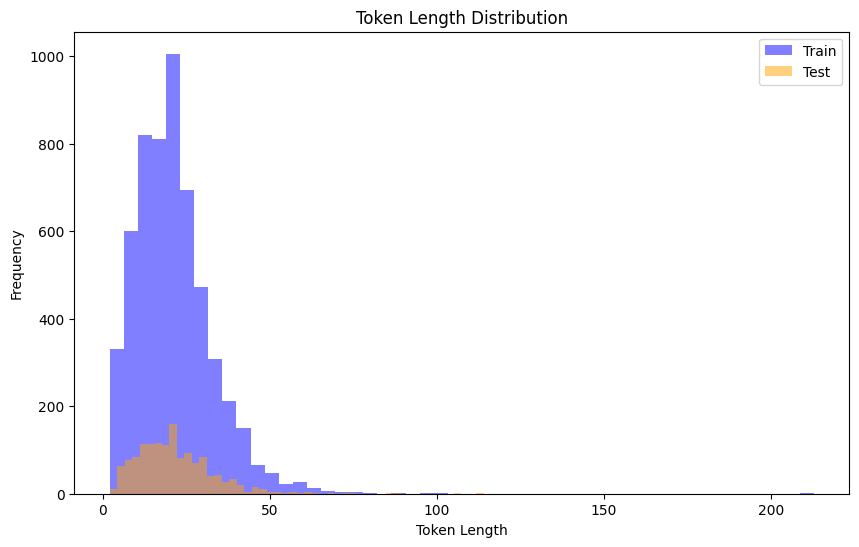

In [25]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [26]:
model = t.get_classifier()

In [27]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [28]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='auto')

In [29]:
history = learner.fit_onecycle (2e-5, 10, callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
700/700 [==============================] - 455s 618ms/step - loss: 1.7233 - accuracy: 0.2646 - val_loss: 1.3939 - val_accuracy: 0.4886
Epoch 2/10
700/700 [==============================] - 428s 612ms/step - loss: 1.2551 - accuracy: 0.5238 - val_loss: 1.0824 - val_accuracy: 0.5793
Epoch 3/10
700/700 [==============================] - 428s 612ms/step - loss: 1.0558 - accuracy: 0.5989 - val_loss: 1.1294 - val_accuracy: 0.5764
Epoch 4/10
700/700 [==============================] - 428s 612ms/step - loss: 0.9275 - accuracy: 0.6518 - val_loss: 1.0569 - val_accuracy: 0.5936
Epoch 5/10
700/700 [==============================] - 428s 611ms/step - loss: 0.8258 - accuracy: 0.6945 - val_loss: 1.1247 - val_accuracy: 0.6143
Epoch 6/10
700/700 [==============================] - 428s 612ms/step - loss: 0.7020 - accuracy: 0.7396 - val_loss: 1.1052 - val_accuracy: 0.6350
Epoch 7/10
700/700 [==============================] - 428s 61

In [30]:
# Save the trained model
learner.save_model('/kaggle/output/bemoc.zip')

In [31]:
classes=t.get_classes()

In [32]:
cm = learner.validate(class_names=t.get_classes())

44/44 [==============================] - 15s 276ms/step
              precision    recall  f1-score   support

       anger       0.55      0.47      0.51       211
     disgust       0.51      0.62      0.56       271
        fear       0.74      0.79      0.77       192
         joy       0.78      0.83      0.80       305
     sadness       0.70      0.63      0.66       265
    surprise       0.72      0.56      0.63       156

    accuracy                           0.66      1400
   macro avg       0.67      0.65      0.65      1400
weighted avg       0.67      0.66      0.66      1400

